# Day 17: Pyroclastic Flow

Looks kind of like tetris. https://adventofcode.com/2022/day/17

Oddly-shaped rocks appear out of nowhere in mid-air. Jets of hot gas push them to the left and right as they fall. The elephants are testing me. How tall will the tower be, after the 2022nd rock falls?

In [53]:
example = False
total_rocks = 3325

<hr>

In [54]:
import numpy as np
import pandas as pd

Rock can move left, right, or down if it is not blocked by the walls or by resting rock.

In [55]:
def gas_jet(jetseq):
    '''return the next character and remainder of the string, repeating the sequence if needed'''
    jet = jetseq[0]
    if len(jetseq) == 1:
        jetseq = puzzle
    else:
        jetseq = jetseq[1:]
    return jet, jetseq


def blocked_right(tower):
    '''blocked if any part of a moving rock is in rightmost column or up against resting rock'''
    for row in tower:
        if row[len(row)-1] == 1:
            return True
        else:
            for i in range(len(row)):
                if row[i] == 1 and row[i+1] == 2:
                    return True
    return False


def moveright(tower):
    '''shift moving rock to right'''
    if not blocked_right(tower):
        for rownum in range(len(tower)):
            for position in range(len(tower[rownum])-1, -1, -1):
                if tower[rownum, position] == 1 and tower[rownum, position+1] == 0:
                    tower[rownum, position+1] = 1
                    tower[rownum, position] = 0
    return tower
                

def blocked_left(tower):
    '''blocked if any part of a moving rock is in leftmost column or up against resting rock'''
    for row in tower:
        if row[0] == 1:
            return True
        else:
            for i in range(len(row)):
                if row[i] == 1 and row[i-1] == 2:
                    return True
    return False


def moveleft(tower):
    '''shift moving rock to left'''
    if not blocked_left(tower):
        for rownum in range(len(tower)):
            for position in range(len(tower[rownum])):
                if tower[rownum, position] == 1 and tower[rownum, position-1] == 0:
                    tower[rownum, position-1] = 1
                    tower[rownum, position] = 0
    return tower
                

def blocked_below(tower):
    '''blocked if any part of a moving rock is directly above resting rock'''
    for rownum in range(len(tower)-1):
        for position in range(len(tower[rownum])):
            if tower[rownum, position] == 1 and tower[rownum + 1, position] == 2:
                return True
    return False


def movedown(tower):
    '''shift moving rock down'''
    for rownum in range(len(tower)-2, -1, -1):
        for position in range(len(tower[rownum])):
            if tower[rownum, position] == 1 and tower[rownum+1, position] == 0:
                tower[rownum+1, position] = 1
                tower[rownum, position] = 0
    return tower
                

def solidify(tower):
    '''mark all moving rock as resting rock'''
    for i in range(len(tower)-1):
        for j in range(7):
            if tower[i, j] == 1:
                tower[i, j] = 2
    return tower


def settle(tower):
    '''rock falls if possible, or comes to rest if blocked'''
    if blocked_below(tower):
        rest = True
        tower = solidify(tower)
    else:
        rest = False
        tower = movedown(tower)
    return rest, tower


def trim_top(tower):
    '''remove blank rows from the top after the rock settles'''
    while len(tower) > 0:
        if sum(tower[0,:]) > 0:
            break
        else:
            tower = np.delete(tower, 0, 0)
    return tower


def draw_tower(tower):
    for row in range(len(tower)):
        s = ''
        for symbol in tower[row]:
            s += '.@#'[symbol]
        print(s)    

In [56]:
if example:
    puzzle = '>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'
else:
    puzzle = '''>>>><<<<>><<<>><<>><<<<>><<<<><<<><<<<>>>><<<>><<<>><<<<>><<><<<>>><<<>>><<>>><<>><<<>>><><>><<<>><><<>>><<<<><<<<>><<<<><<>>>><<>>>><<<<><<<<>><>><>>><<<<>><>>>><<<<>><<<><<<<>>>><<><>>>><<<>>><<<<>><<<<><>>><<<>>><<<<>>><<<>><<>>>><<>>><><<<>>>><<<<>>>><>>>><<<<>>><<>><<<<>><<>>>><<<>><<<>>>><>>>><<>>>><>><>>>><<<<>>><<<<>><<<<>>><<<<><<<>>>><<>>>><<<><<<<><<<<>><<<<>>>><>><<<<>>><<>><<<<>>><><<<><<>><<<<>><<>><<<<><>>><<>>><<><<<<>><<<<>><<>><><<<<>><>>><<<<>>>><>><<<<>>><<<><><<<>><<><>>>><<>>>><>><<>>><<<>>><<<><<>>><<><<>>>><<>>>><<<>>>><<<<>>><>>><>><>>>><<><>>><<<<><<>>><<<<>>>><<<>>><<>><><<>>>><><<<><<<<>>>><<><<<>>><<<>>><<>>>><<<<>><<<<>><<><>>><<<<>>><<<<>>>><<<<>><<<<>>><<<<>>>><<<<>><>>><<<><<><<<><<<<>><>>>><<<<>>>><<>><>>>><<<>>>><><<<<>>><<><<<>><<>>>><<><<<>><<>>><<<<>>>><<<<>><>><>><<><<>>>><<<><>><<>>>><<<>>><>>>><<<>>><<<<>>>><<<>>><>><<><>>>><>>><>>><><<>>>><>>><<>><<<><<>><<>>><>>>><<><>>><<<<>><>>><>>><>><<<<>>>><<<<>>><<<>><<<<>>><>>>><<<>>>><<>><<>>>><>><<>><<<<><<<<>>><<>>><<>>>><<>>><<<<>>>><>>>><<<>>><<<>>><<<<><<<>>><>><<<><<<<>>><<<>>>><>>><>><<>>>><><>>><>>>><<>>>><<<>>><<>><<><<<<>>><<<>>>><>><><<<>><><<<<><<<<>>><<<>>>><<<<>>><<>>>><>>><<<<>><<>>>><>>><>><>>>><<<<>>>><<<<>>>><<<<>><<<<>><<<>>>><>>>><<<>><<<>><<<<>>>><>>><<<>>><<<<><<<<><><>>>><<<>>>><<<><<>><><<>><<<>>>><<<<><>>><<<<>>>><>>>><<>>>><<<<>>>><><<>>>><<>><<<<><<<<>><<>>>><<<>>>><><>>>><<<>><><<<><<>>><<>>>><<<>><><>><<<<>>>><<><>>><><>>>><<<<>>>><<<>>><<<>>><<><>><<<>>><<>>><<<<><>><<<>>><>><>>><<<<>><<<>>>><<<>>><<>>><>><<>>><<<<>><>>><<<<>>>><<<<><<><>><<<<>>>><<<<><>>><<<<>>><<><><>>>><<>>>><<<<>><<<<>>>><<><>>><<<<>>>><<<><<>>><<>>><<<>>>><<<>>>><<>>>><<<>>><><<<>><><<<<><<>><<<<><<<><<<>>><<<>>>><>><<<<>>>><<>>>><<>>>><<<>>>><>>>><<<>>><>><>>><>><><>>>><<><<>><<<>>>><<<><<<>>>><<<<>><<<><>>>><<<><<><>><<<><<><<<<>><>>><<<><<>>><<<<>><><<<>>><<<<>><<>><<>>>><>><<>><><<<<>><<<<>><<<<>>>><><<<>>><<>><>>><>><>>>><<<<><<>>>><>><>><<<>><<<><>><<<><>>><<<><<<<>><<<>>><<<<><>><<<<>>>><<><>>><<><<<>>>><<>>>><>>><<<<>><><<>>><<>><<<<>><<<<>>><<><<<>>><<<>><>><<<>>>><<>>><<<<>><>>>><>>><<<>><<<<>>>><>>>><<>><>><<<><<><<<<><<<<>>><<<>>><<<><><<<>><<<<>>>><<<><<<<>><<>>><<<<>><>>>><<<>><<>>>><<<<><<<<><<><<<>>>><<<>>>><<<>>><>>><<<<>>>><>>>><<<><<<><<>><<><<<<>>>><<<>>>><<<<>><<<>>><<<>>><><<<<><<>>><<><<<><<<<>><<>><>><<<>>><<>>>><<<<>>><<<<>>>><><>><<<<>>><<<<>>>><<<>>>><<>><<<<>>>><<>><<<<>>><<<<>>>><<>>><><<<<>><<><<<>>>><<>><<>><<<<>>>><<<><<<>>><<<<>><<<<>><<<>>>><<>>>><>>><<<<><<>>><<>>>><>>><<<<>>>><<>>><<<>>><<<<>><<><<<>>>><<><<<>><<><<<<>>><<<<>><<<>>>><><<<<>>>><<<<><<<><<>><<<<>><>>>><>><<<<><<<>><<<>>>><<>>><<<>>>><<<><<<<>><<<>>><<<<>>><<<><<>>>><<<<>>>><>>>><<>>>><<<><><<<<>>>><>>>><>>><><<>>><<>>>><<<>>><<>>>><<<>><<>><<<<>>>><<>>><<>>><<><>>>><>>>><<<<><<>>>><<<<>><<<<>>>><<>><>><>><<<>><<<><>><<>>>><<><<<>>>><<>>>><><<<><<<>><<<><<<<>>>><<<>><<>><><<<<>><<<<>>>><<<>>><<><<<<>>>><<>><><<<><><<<<>>><<<<>>>><>><<>>>><<>>>><<<<>>><<<<>>>><<<>><<<>><<<<>>><<<<><<>><<<><>>>><>><<<<>>><>>>><>>>><>>>><<>><<<<>><<<<>><><<<><>>>><<<>><>>>><<<<>>>><<<>><>>>><<<<><<<<>>><<<<>>><>>><<>>><>>><>>><<<>>><<>><<<>><>>>><<<<><<<><<<<>>>><<>><<<<>><<><<<<>>><<<<>><<<<>><<<><<<<>><<>><>>><<><<>><<>><<<>>>><<<<><>>>><>>><<<>>><<>><<<<>><<<<>>>><<>>><<>><<>>><>><>>>><<><<<>>>><<>>>><>>>><<><<<><>><<<<>>><<<><<>><<<<>>><<<>>><<<><<<<><<<<><<<<>><><<>>><>>>><>><<<>>>><><>><<<><<<<>><<>>><<><<><<<<><<>><<><<<>>>><<<><><<<<><<<><<<<>>><<<<><>><<<<>>>><<<>>>><<<>>>><>>><<><<>>><<<>><<<><<<><<<<><>><><><<<>>>><<><<>>><><>>><<><<<>><<>>>><<<<>>>><<<>><<<>>><><<<<>><<>>><<<>><>><<>><<>>>><<><<<>>>><>><<<<><<><<<>>>><<<<>>><<<<><><<<>><<<><<<>>><<<<><<<>><<<>><<>>>><>>><<<>>>><<<><><>><<<<>>><><<<><<><<>>><<<<><<<<>><<<<>>>><<<<>>><<<<><<><<>><><<>>>><<<>>>><<>>>><<<>>>><<>>><>><<<>>><<<<><>>><<>>><>><<>><<><<<><<<>><><><>>>><<<>><<<<><<<>>><<<>>>><>>><<>><<><<<<>>><<>>><<>>><<<<>>><><<<>>><<<>>>><<><>>><<><>>>><<<<>>><<<>><<<<>><<<<>><>>><<<<>>>><>>>><<>>>><<><<>><><>>><<<<>>><<><<<>>>><<>><<<<>>><<><<><<><><<<<><>><>>><<<>><<><<>><<<<>>>><<<>><<<>><<<<>>>><<>>>><<>>><<<>>><<<><<<>>>><><><<<>>>><>>>><<<>>><>><<<><<>><<<<>>>><<<>>>><<<<>>>><>>>><<<<>><>>>><<<<><>><<<<>><<<>><<<>><<<<>>><>>><>>><>>><<<>>>><<<<>><<<>><<><>><<>><>>><>>>><<>><<<<>><<>>>><>>>><<>>>><<<<><>>>><<<><<><<<<><<>>><<<>>><>><<><<<>>>><<<>>><<>>><><<><>>><<<<>>>><>>><<>><><<<<>>>><>>>><<<><<<<>><<>>>><<<<><<<<>>><<<><<<>>>><>>><<<<>>>><<<<>>>><<><<<<>><<<<><>>>><>>><><<>><<<<><<<<>><>>>><<<<><>>><<<>>>><<<>>><<<<>>><<><<<<>>><<<>><<<<>>><<<>><<>>>><<<>><<<<>>><<<>>>><<<<>><<>>>><<<>><<<<><<<<>>><<<<>>>><><<<>>>><><<<<>><<>>>><>>>><<>>>><<><<><>>><>><<<<><<<><<<><<>>><<<>><<<<>>><<<>><<>>><>><>>>><<<>>>><<>>>><<<>>>><<<<>>>><<<>>><<<<>><>><><>>><<<<>><<<>><<<>>>><<<<>><>>>><<>>><<<<><>><<<>>><<<>>>><<<><<<<>>>><<<><>>>><<<<>><>>><<>><><<<<>><<<<>><<<>>><<<>>>><<<<>>><>>>><<>><><<><<>><<<><<<>><<<><><<<<><<>><<<<>>>><<<<>>>><<>>>><<<<>>><<<<>>>><<<<>>>><>>><<<>><<<>><<><<<><<<>><<<<><<>>>><>>><<<>>><><<>>><<<>><>>>><<<>><<>><<<<>><<<<>>>><<<<>>><<>>>><>>>><<<<>>><>><<>>><<>><<<<>>><<>><<<<>>><<>>><>>><<<>>><<><<><<>><><>>><<><>><>>><>><<<<>>>><<<>><>>><<<>><<<<>><<>>>><<><><<<<><>><>><<>><<<>><<<<>>>><<<<>>>><><<<>>><<<<>>>><<<<><<<<>>>><<<>>><<<<>>><<<>>><<<><<<>><>><>>><<<><>><>>>><>>>><<<>>><<><<<<>>><<>>>><<<><<<<>><<>><>>><<<><>>><<<>><<<<>><<<<><<<<><<<<>><><<>><<<<>>>><<<>>><<<<>>><<<><<<><<<<>><<<><>>>><<>><<<<>><<<<>>><>>>><<<<>>>><<<<>><>>><>>>><<<>>>><<><>><<><>>>><>>>><<>>><<<>>><<>>>><<>><>>><<<>><<<>>>><>>><<<><>>>><<><>>><<<<>><>>>><<<>><<<><<<><<>>><<<>>>><<<>>><<<<>>><<>>>><>>>><<>>>><<<<><<<>>><<<<><<>><>>><<<><<>>><>>><<<<>>>><<<><<<><>><<<>>><><<<>><<<<>>><<<<>>>><<<>>><<>>>><<>>>><>><<<>>>><>>>><<>>><<><<<><<<<><<<<><>>>><>>><<<>>>><<<<>>>><<<<>>><<>>>><>><>><<>><>>>><<<><<<<><<>>><<><<>>><<<<><<<>>><<<<>>><<>><<><<<>>>><>>>><>>><>>>><<<>>>><<<><<>><><>><>>><<<>>>><<>><<<><<<<><<>>>><<><>>>><<><>>>><<><><<<<>>><><<>><<<><>><>><<>>><<<>>>><><<>>>><<<<><<<<>>><>>>><<<<>><<<<>>>><<<>>><<>>>><><<<<>><<<<><<<<><<>><><<<>>><<<<>>><<<>><<<<>>>><<<>>><<<<>>>><>>><<<>><<<<>>><<<<><<<>><<<>>><<<>>>><<>>>><><<<>>>><<<>>><<>>>><><<>>><<<<>>>><><<><<<<>>>><<>><<<<>><<>><<<<><<<>><<<<>>><>>>><<<>><<<>>>><<<>><>><<<>><>><>><<<><<<<>>>><>>><<<<><>>><>>>><>>><<<<>>><<<>>>><>>>><<<<>>>><>>><>>><>>>><<>>><<<<>><<<>>>><<>>><>><<<<>><<<>><<<<>>>><>>><<<<>>><<>>>><>>>><<<>>>><<<>><<<<>><<<>><<<>><<<<>><<<<>><>><<<<>>><<<>><<<><<<<>><<<<>>>><>><>>><<<<><<<>>>><<>>><<<<>><<<>>>><<>>><>>>><<>>><<<<><<>>><<<<>>>><>>>><><<<>>><<<>><<>>>><<<>>><<<<>><<<>>>><><>>>><<<<>><<<<>>>><<<>>>><>>>><<<<>>>><<<<>>><<>>><<<><<<>><<<<><<<>>>><>>>><>>>><<<<>>>><<<><<>><<<<><>>><<>>><<<>>>><<<<>>>><<>>><>><<>><<><>>>><<<><<><>>>><>>><>>><<<><<<>><>>><<<<>>><<<>>><<>><<>><<<>>>><<>>>><>><<><<<<>>><<<>><<<<>><>><<<>>><>><><<>>>><<<><<><<>>>><<><<<><><<<<>><<>><<<<>>>><>>><<<>><<<<>><<<<>><<<<>>><<<<>>>><<<<>>><>>><<><<>>>><<>>><>>>><<<><<>><>>>><<<><<><<<<>>>><>>>><><<<><>>>><<<>>>><<<>>>><<<<><><<<<>>><<<<>>>><<>>><<<<>>>><><<<<>>><<>>><<<<>><><<<<>><>><>>>><>>>><><<>>>><<<<>><<<<>>><><<<>>>><<><>><>>><<>>>><>>><<><<<>>><><><>><>><<<><<><>>><<>>>><<>>><>><><<<<>>>><><>>><<<<>>>><<><<><<<<>><<><>>>><<><>>><<>><>><<<><<<<>>>><<<><>>><<<>>>><<<<>><>>><<>><<<>><<<<>>>><>>><<<<>>><<<>><<<>>><<<>>><<>>><<<><<<<>>>><<<>>><<<<>>><>><<><<<><<<>>>><<<<>>>><<<<>>><<<><<<><<<><<<>>>><<><<><<>><><<<<>>><<<>>>><<<>><><<<><<<<>>><<>><>>><<><>>><<<><>>><>>><<<<><<>>><>>>><>>>><<<<>>>><>>><<><<<>><<<>><>>><>><<<>>><<<>>><<<>>>><<<<><<><<<>>>><><<<<>><<><<><<<<>>>><<<>><<<>>>><<><<<>>><<><<<<>>>><<<>>><>>><>>><<<>>><<<<>>>><<<<>>><><<>><<>><<<<>>>><>><<<>>>><<><<>><<>><>><<<>>>><<><<<>><<<<><<<<><<<<><<<><>><>><>>><<<<><<<<>>>><<><<>><<<<>>><<<><>>>><<<>>>><<><>>>><<>>>><<<>>>><>><<><<>>><<<>>><<><<<>>><>>>><<<><<><<<><<>>><><<<>>><<><>><><<>>>><<<<>>>><<<><<<<><<<<>>><>><<>><<<<>><>>><<<>><>>>><<><><<<<>>>><<>>><<>>>><<>>>><<<>>><<>><<>><<<>><>>><<><<<><<<><<<<>>>><<>>><<<><<>><<<>><><<<>>>><<>><<<>>><<<<>>>><<<><<<<>>>><><<<<><<>>><<>><<<>>>><<>><><><<<<>>>><>>>><<>>><<<><<<>><<<>>>><<<>>>><>>><<<<><>>>><<>><>>>><<<<><<<<>><<<>><><<<>>>><<<<>>>><>><<<>>>><>>>><<<>><>>>><<>><<<>>>><>><<>>>><<<<>>><>>><>>><<<>>><>>>><<>>>><<>>>><<<>>><<<<>>><<<><<<><>>><<<<><<<>>>><><<<<>>><<><<<<><<><<<>>><<<<>>><<<<><<>>><<<>>>><<<>><>><>>>><<>>><<<><<<>>>><<><<>><<<<>>><<>><<<><<>>>><<>>><>><><<<><<<>>>><>>>><<>>><<<<><<<>>><<<<>>>><<<<><><>><>>><<>><>>><<><>>><<><>>>><<<<>>><<>><<>>>><<<>>>><<<>><<<<>><>>>><<>>>><><<>>><><<><>>>><<<<>><<<>><>>>><>>><>>><>>>><><>><<<>><>><<>>>><<>>>><>>><<>><><<>><>><<<><<<>>>><<<<>>><<<><><<<<>>>><>>><<<<>><<<>>><>>>><<>><<<>>>><<><<<<>>>><<><<>>>><>>><>><<>>>><<><<>>>><<<<><<<<>>>><>>><<<<>>>><>>>><<<>>>><<<<>>><<>><<<>>><<<<>>><<>>><<<<><>>><<<<>>>><<<><<<>>>><<<>><><>>><>>>><>><<<<>><>>>><<>>><<<<>><>>><<>>><<<>><<<<>>>><<<>>>><<>>>><<><<<>>>><<<>><<>>><<<<>><<>>>><>>><<>>>><<<<><<>>>><<<<><<>>>><<<<>>><>>>><>>>><<<>>>><<<>>><<<<>>><<<><<<<>><<><>>><>><><>>><<<<>>>><<>><<>><<<<>>><<<><>><<<><<<<>>>><<<<>>>><<<>><<<>><<<>><<<<>>><<<<>>>><<<<>>>><<<<>><<>>><>>>><<<<><<<>><<<>><><<>>>><<<<>><<>><<>>>><><<><>>><<<><<<><<>><>>><<<<><<<>><<<>>><><<<>><<>>><<<>>><<<<>>><<><<<<>>>><<<>>><>>>><<>>>><>><>><<><<<<>>><<<<>><<>><<>>>><<<<>>>><<>>>><<><>>>><<>>>><<<>><<>>>><<>>><<<>><<>>>><<<>><>><<>><<<<>>>><<<><<>><<<<><><<<><<>>><<<>>>><<<<>>><<>>><>><<><>>>><>>>><>>>><<<<>>>><<<>>><<>>>><<<<>>>><>><<<<>>><<<<>>>><>><<><>>>><<<<><>><<>><<>>>><<<<>>><<<>>><<<>>><>>>><>><<<<>><<<>>>><>>><<<>>><<<>><>>>><>>><<>><<<<><>><<<><<<>><<<>><<<<>>><<<<>>><<>>><<<<>>><<<<>><>>><<>><<>>>><>>><<<<>>><<<<><<<>>>><<<>>>><>>>><<>><<>><<>>><>>><>>><<<>>>><<<><>>><>><<<>><<<<>><<<<>>>><<<>>><>><<<<>>>><<<<>>>><<>>>><<>>><>><<<>>><<<<>>>><>>><<<<><<>><<>><<<<>>><<<<>>>><>>>><><<<<><><<<<>>>><>>><<><<<>><<>><<>>>><>>>><<<>><>><<><<<>>>><>>><><<>>>><<<<>>><<<<>>><>>>><<<<>><<<>>><<<><<<>><<><<<>>>><<<<>>><<<>>><<<>>><>>><>><<>>>><<>>><<>>>><<>>>><><<<>>><>><<>><<>>>><<<><<>><<<<>><<><>><<<<><>>><<>><>>'''
jetseq = puzzle

rocks = []
rocks.append(np.array([[0, 0, 1, 1, 1, 1, 0]]))
rocks.append(np.array([[0, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 1, 0, 0, 0]]))
rocks.append(np.array([[0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 1, 0, 0]]))
rocks.append(np.array([[0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0]]))
rocks.append(np.array([[0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0]]))

spacer = np.array([[0 for i in range(7)] for j in range(3)])
tower = np.array([[2, 2, 2, 2, 2, 2, 2]])

rocknum = 1
while rocknum <= total_rocks:
    rocktype = (rocknum - 1) % 5
    rock = rocks[rocktype]
    tower = np.vstack((rock, spacer, tower))
    section_height = len(rock[:,0]) + 4
    rest = False    
    while not rest:
        section = tower[0:section_height, :]
        jet, jetseq = gas_jet(jetseq)
        if jet == '<':
            section = moveleft(section)
        else:
            section = moveright(section)                
        rest, section = settle(section)
        tower[0:section_height, :] = section
        section_height += 1
    tower = trim_top(tower)
    rocknum += 1

print('Tower height:', len(tower) - 1)    # don't count the floor

Tower height: 5198


## Part 2

Now the elephants want me to simulate one trillion rocks. That's too long for an iterative approach. The rock shapes are a repeating pattern, and so are the jets. There's probably a repeating pattern in the pile, too.

I found, by staring at and coloring the stack in Excel, that after the first 15 rocks in the example, which stack a height of 25 rows, a repeating pattern in the tower appears. The repeating pattern is 53 layers tall and contains 35 rocks.

The jet sequence in the puzzle input has length 10091, compared to the example sequence of length 17. I need a better way to look for a pattern.

What if we tracked tower height vs. rocks dropped? 


In [39]:
total_rocks = 50000
rocks_dropped = [0]
tower_height = [0]

tower = np.array([[2, 2, 2, 2, 2, 2, 2]])
jetseq = puzzle
rocknum = 1

while rocknum <= total_rocks:
    rocktype = (rocknum - 1) % 5
    rock = rocks[rocktype]
    tower = np.vstack((rock, spacer, tower))
    section_height = len(rock[:,0]) + 4
    rest = False
    
    while not rest:        
        section = tower[0:section_height, :]
        jet, jetseq = gas_jet(jetseq)
        if jet == '<':
            section = moveleft(section)
        else:
            section = moveright(section)                
        rest, section = settle(section)
        tower[0:section_height, :] = section
        section_height += 1
    tower = trim_top(tower)
            
    rocks_dropped.append(rocknum)
    tower_height.append(len(tower) - 1)
            
    rocknum += 1

dic = {'rocks': rocks_dropped, 'height': tower_height}
df = pd.DataFrame(dic)
df


,rocks,height
0,0,0
1,1,1
2,2,3
3,3,6
4,4,10
...,...,...
49996,49996,78309
49997,49997,78312
49998,49998,78314
49999,49999,78316


Now let's just check for periodicity by brute force, since I'm not understanding how to do this with Fourier transform at the moment.

In [43]:
table = []
for n in range(5000):
    row = []
    for m in range (1, 10):
        row.append(df.height[n*m] - df.height[n*(m-1)])
    table.append(row)
        
npdata = np.array(table)

In [44]:
print(np.array(table))

[[   0    0    0 ...    0    0    0]
 [   1    2    3 ...    2    3    2]
 [   3    7    3 ...    6    3    5]
 ...
 [7819 7833 7819 ... 7821 7839 7807]
 [7822 7832 7822 ... 7821 7850 7802]
 [7823 7836 7822 ... 7821 7841 7807]]


In [45]:
np.savetxt('data.csv', npdata, delimiter=',')

Aha! There's a repeating pattern in the height for every 1725 rocks. The first 1725 rocks give a height of 2699, and thereafter each 1725 rocks add a height of 2702 units.

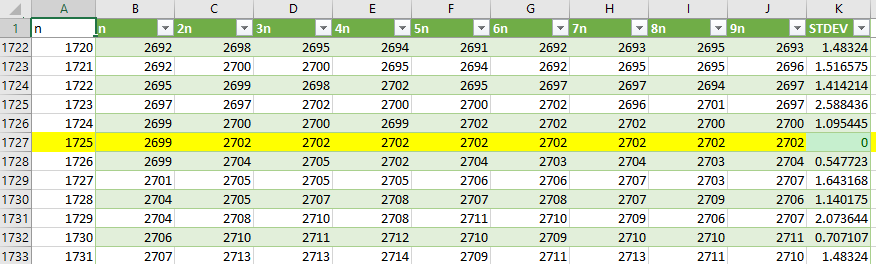

In [46]:
1000000000000/1725

579710144.9275362

In [48]:
1000000000000 % 1725

1600

at 1725 + 1600 = 3325 rocks, the height is 5198

5198 - 2699 = 2499

So... let's try...

Height of 2699 for the first 1725 rocks. Then 2702 * 579710143 groups of 1725 rocks. Then 2499 for the last 1600 rocks.

In [57]:
2699 + 579710143 * 2702 + 2499

1566376811584

It's right! Yayyyyyy!!!!